## Visualize Ground-Truth Shape Hierarchy of Graphs and Edge Relationships

In [1]:
%matplotlib inline

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# ground-truth data directory
root_dir = '../data/partnetdata/chair_hier'

# read all data
obj_list = sorted([int(item.split('.')[0]) for item in os.listdir(root_dir) if item.endswith('.json')])

# visualize one data
obj_id = 0
obj = PartNetDataset.load_object(os.path.join(root_dir, str(obj_list[obj_id])+'.json'))

# edge visu: ADJ (red), ROT_SYM (yellow), TRANS_SYM (purple), REF_SYM (black)
draw_partnet_objects(objects=[obj], object_names=[str(obj_list[obj_id])], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True,
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)')
print(obj)

PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_surface    {2}
  |  |  ├0 back_surface_vertical_bar [LEAF] {3}
  |  |  ├1 back_surface_vertical_bar [LEAF] {4}
  |  |  ├2 back_surface_vertical_bar [LEAF] {5}
  |  |  ├3 back_surface_vertical_bar [LEAF] {6}
  |  |  ├4 back_surface_horizontal_bar [LEAF] {7}
  |  |  ├5 back_surface_vertical_bar [LEAF] {8}
  ├1 chair_seat    {9}
  |  ├0 seat_surface    {10}
  |  |  ├0 seat_single_surface [LEAF] {11}
  ├2 chair_base    {12}
  |  ├0 regular_leg_base    {13}
  |  |  ├0 leg [LEAF] {14}
  |  |  ├1 leg [LEAF] {15}
  |  |  ├2 leg [LEAF] {16}
  |  |  ├3 leg [LEAF] {17}



/home/novare/Projekte/structurenet/code/vis_utils.py:203: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Box-shape AE Reconstruction

In [6]:
%matplotlib inline

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# results directory
root_dir = '../data/results/box_ae_chair'

# read all data
obj_list = sorted([int(item) for item in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, item))])

# visualize one data
obj_id = 2
obj_dir = os.path.join(root_dir, str(obj_list[obj_id]))
print(obj_dir)

orig_obj = PartNetDataset.load_object(os.path.join(obj_dir, 'orig.json'))
recon_obj = PartNetDataset.load_object(os.path.join(obj_dir, 'recon.json'))
    
stat_filename = os.path.join(obj_dir, 'stats.txt')
with open(stat_filename, 'r') as stat_file:
    stats = stat_file.readlines()
stats = [x.strip() for x in stats]
stats = list(filter(None, stats))
for stat in stats:
    print(stat)

draw_partnet_objects(objects=[orig_obj, recon_obj], object_names=['original', 'reconstruction'], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True,
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('Original Structure:')
print(orig_obj)
print('Reconstructed Structure:')
print(recon_obj)

FileNotFoundError: [Errno 2] No such file or directory: '../data/results/box_ae_chair'

## Box-shape VAE Free Generation

In [2]:
%matplotlib inline

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# results directory
root_dir = '../data/results/box_vae_chair'

# read all data
obj_list = sorted([item for item in os.listdir(root_dir) if item.endswith('.json')])

# visualize one data
obj_id = 0
obj = PartNetDataset.load_object(os.path.join(root_dir, obj_list[obj_id]))

draw_partnet_objects(objects=[obj], object_names=[obj_list[obj_id]], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True, 
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('Tree Structure:')
print(obj)

FileNotFoundError: [Errno 2] No such file or directory: '../data/results/box_vae_chair'

# Measure of Infeasibility Calculations

In [2]:
%matplotlib inline
from compute_moi import *
from compute_moi_util import *

options = {
    "output_level": 1,
    "max_iterations": 1000,
    "dump_models": False,
    "surface_area_tolerance": 0.003,
    "print_surface_area_histogramm": True
}

res = moi_from_graph(obj, options)
print("Measure of Infeasibility: {}, includes a hover penalty of {}".format(str(res.moi), str(res.hover_penalty)))

16:07:28 - INFO     - CUTTING OUT INTERSECTIONS, COLLECTING CONTACT SURFACES
16:07:28 - INFO     - OPTIMIZING


/home/novare/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/optimize/_trustregion_constr/projections.py:104: UserWarning: Singular Jacobian matrix. Using dense SVD decomposition to perform the factorizations.
  warn("Singular Jacobian matrix. Using dense SVD decomposition to "


The maximum number of function evaluations is exceeded.
Number of iterations: 1001, function evaluations: 217217, CG iterations: 1660, optimality: 2.73e-02, constraint violation: 3.90e-01, execution time: 4.3e+01 s.
16:08:11 - INFO     - Optimization took 0.7161508798599243 minutes.
Measure of Infeasibility: 4.77361904667093, includes a hover penalty of 1.4537156700533218


## Draw OOBBs

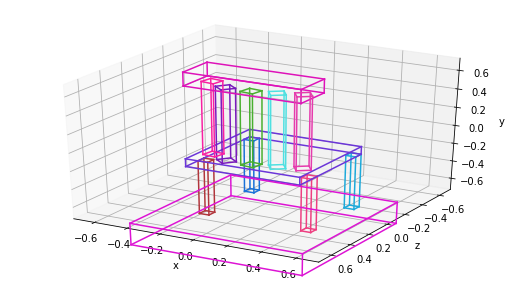

In [3]:
%matplotlib inline
from compute_moi import *
from compute_moi_util import *

fig = plt.figure(figsize=(9, 5))
extent = 0.7
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')

draw_oobbs(ax, res.oobbs)

# Draw Hovering Meshes (if they exist)

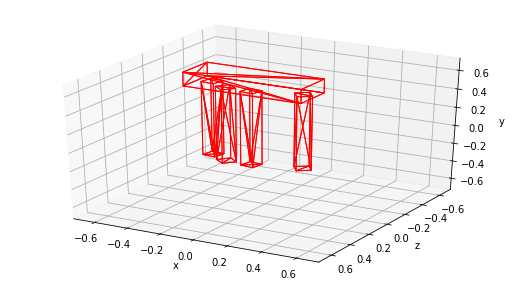

In [4]:
%matplotlib inline
from compute_moi import *
from compute_moi_util import *

fig = plt.figure(figsize=(9, 5))
extent = 0.7
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')

for hm in res.hover_meshes:
    draw_pymesh(ax, hm, color=(1.0, 0.0, 0.0))

## Draw Intersections

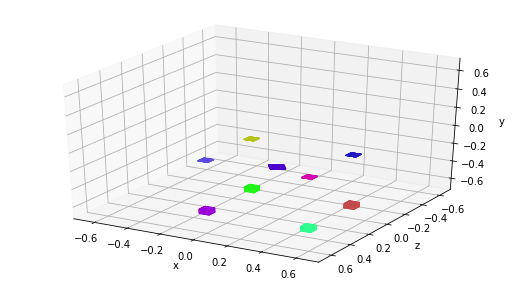

In [5]:
%matplotlib inline
from compute_moi import *
from compute_moi_util import *

fig = plt.figure(figsize=(9, 5))
extent = 0.7
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')

draw_cut_volumes(ax, res.cut_volumes)

## Draw Cut Meshes

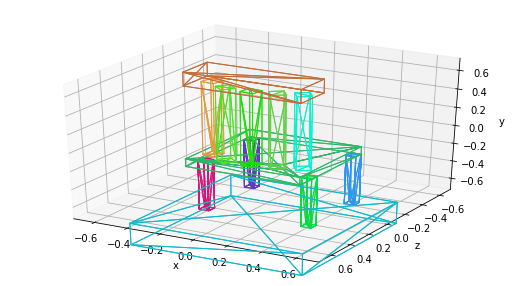

In [6]:
%matplotlib inline
from compute_moi import *
from compute_moi_util import *

fig = plt.figure(figsize=(9, 5))
extent = 0.7
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')

draw_cut_meshes(ax, res.cut_meshes)

## Draw Contact Surfaces

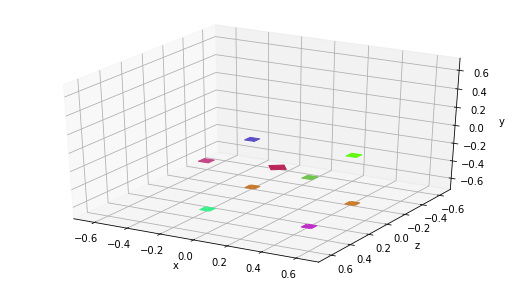

In [7]:
%matplotlib inline
from compute_moi import *
from compute_moi_util import *

fig = plt.figure(figsize=(9, 5))
extent = 0.7
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')

draw_contact_surfaces(ax, res.contact_surfaces)